In [8]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from script.dataset import get_data, get_id_col, cols_emg, cols_emg_cal
from script.visualization import pretty_str

plt.rcParams["figure.figsize"] = (12,9)

In [9]:
X, y = get_data()

In [10]:
tsne = TSNE(2)
X_tsne = tsne.fit_transform(X[cols_emg + cols_emg_cal])

In [11]:
hold_labels = pd.Categorical(y.loc[X['id']])
person_labels = pd.Categorical(get_id_col(X, 1))

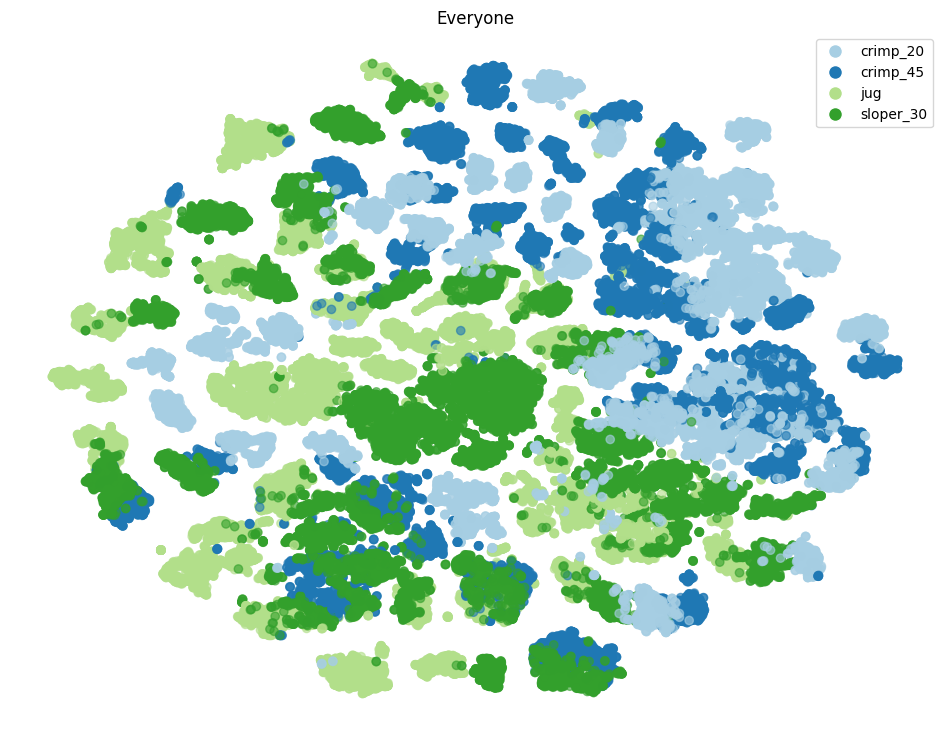

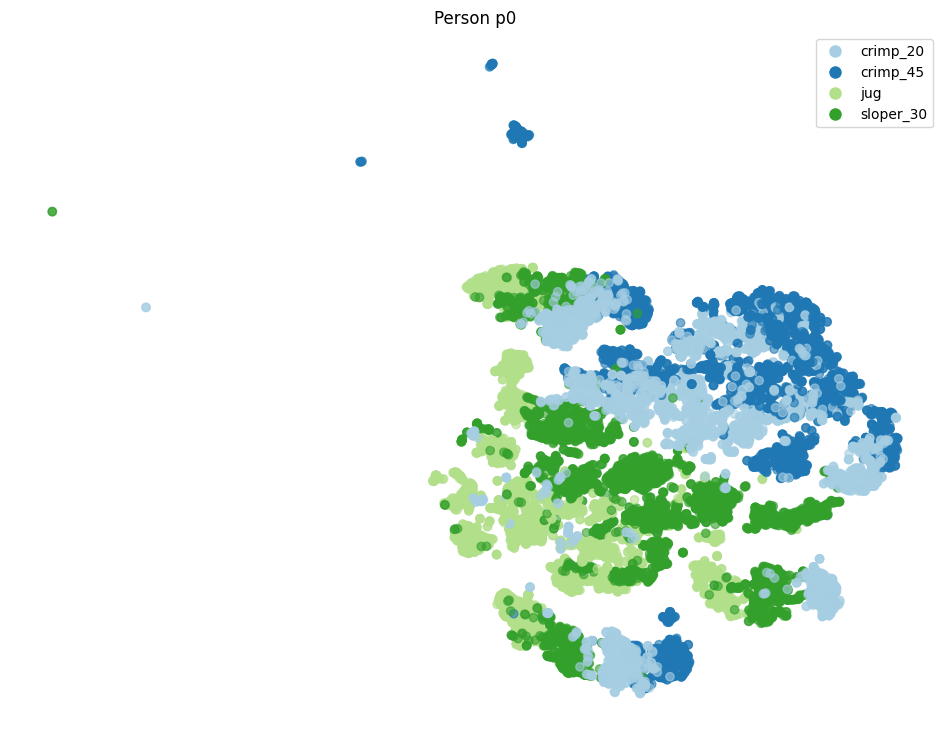

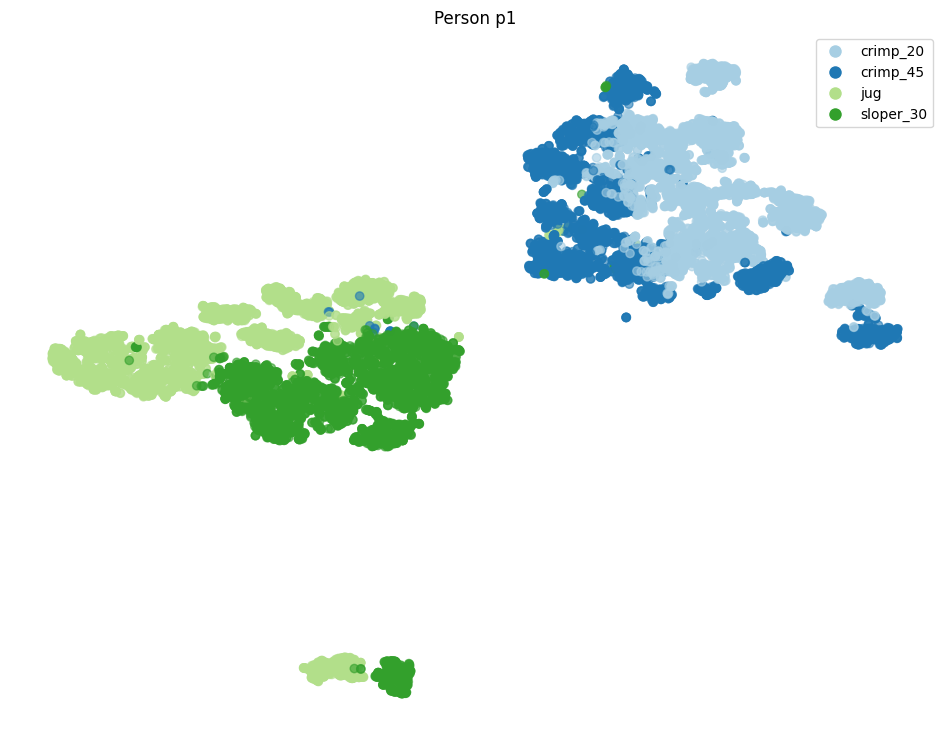

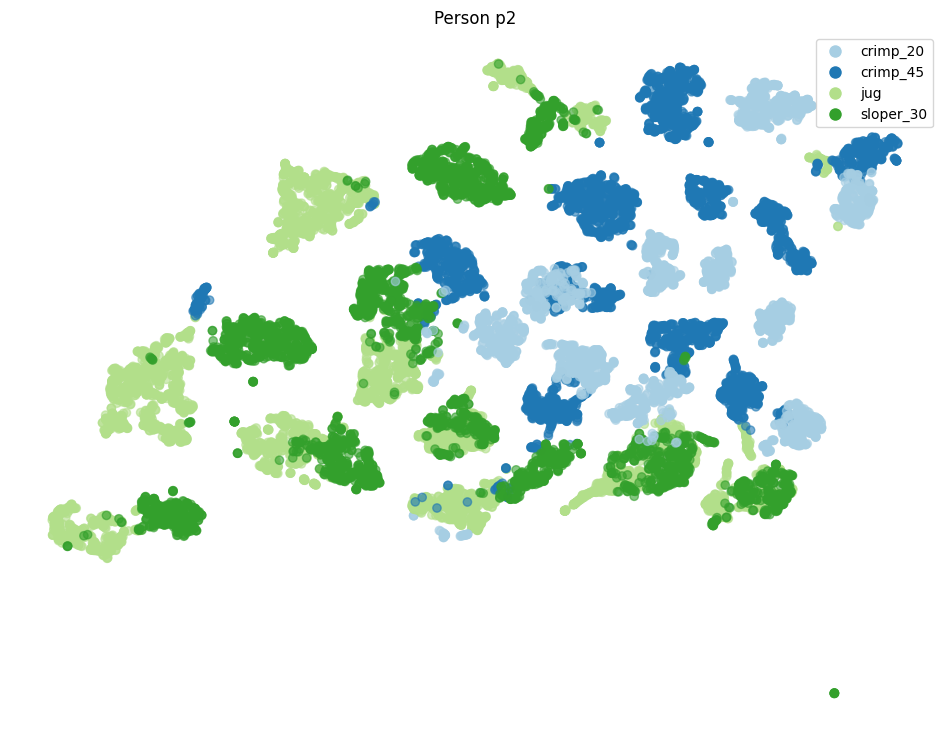

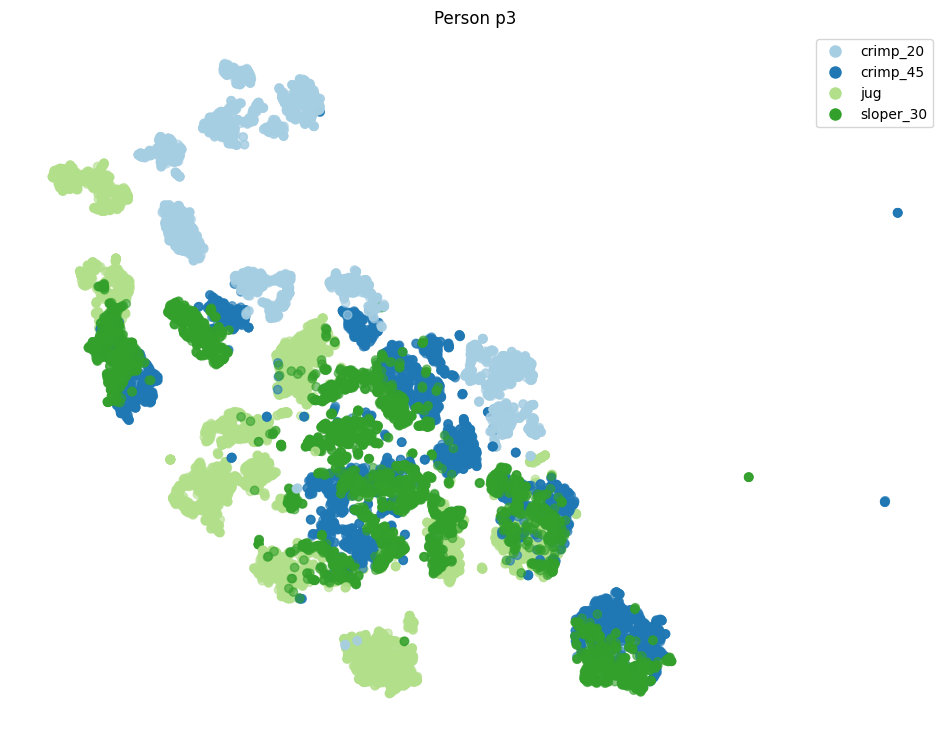

<Figure size 1200x900 with 0 Axes>

In [26]:
def _plot(title, condition = [True] * len(hold_labels), save=False):
    cmap = plt.get_cmap('Paired')
    point_colors = cmap(hold_labels.codes[condition])
    
    plot = plt.scatter(
        X_tsne[condition,0], X_tsne[condition,1],
        c=point_colors,
        alpha=0.6)
    
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10)
        for i in range(len(hold_labels.categories))
    ]
    plt.legend(handles=handles, labels=list(hold_labels.categories))
    
    plt.title(title)
    plt.axis('off')
    if save:
        plt.savefig(f'{title}.png')
    else:
        plt.show()

_plot('Everyone')
plt.clf()
    
for p in person_labels.categories:
    _plot(f'Person {p}', condition=(person_labels == p))
    plt.clf()